# US Retail Sales: ETL, Analysis and Visualization


# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This project is about performing an Extract-Transform-Load (ETL) process on a US retail sales database and performing some exploratory data analyses and visualizations on it. The dataset is the Monthly Retail Trade Survey (MRTS) from the US Census Bureau. It provides estimates of sales at retail and food services stores and inventories held by retail stores, with monthly data ranging from 1992 to present time. The ETL steps include loading the dataset, transforming it into a Pandas DataFrame in Python, cleaning it, saving it as a comma-separated values (CSV) file, and writing an installation script in Python to open the CSV file as a table in MySQL and run SQL queries on it. The analyses and visualization are performed with code written in iPython in this Jupyter notebook, with the resulting figures and explanations embedded throughout. Results are briefly discussed and potential further exploratory analyses are mentioned.

[Back to top](#Index)


## 1. Introduction

This project is based on performing an Extract-Transform-Load (ETL) process on a US retail sales database and perform some exploratory data analyses and visualizations on it. 

The dataset is the Monthly Retail Trade Survey (MRTS) from the US Census Bureau and is openly available online. It provides estimates of sales at retail and food services stores and inventories held by retail stores, with monthly data ranging from 1992 to present time. 

The ETL steps ([Section 2](#2.-Extract-Transform-Load)) include loading the dataset (a spreadsheet in Excel file format), transforming it into a Pandas DataFrame, running multiple steps to clean it and reorganize it, saving it as a comma-separated values (CSV) file, and writing an installation script in Python to write the CSV data into a table in MySQL and run SQL queries on it. 

The analyses and visualization ([Section 3](#3.-Project-Description)) are performed with code written in iPython in this Jupyter notebook, importing the Matplotlib and Seaborn modules. All figures generated for this project are displayed and embedded in the notebook below and can be re-generated in-place from the provided Python code. Results are briefly discussed and potential further exploratory analyses are mentioned.

[Back to top](#Index)

## 2. Extract-Transform-Load

[Back to top](#Index)

### 2.1 The ETL Process

The following ETL steps were implemented on the MRTS dataset:
- Read the original data &mdash; from either the provided Excel file `mrtssales92-present.xls` or its latest downloadable version at census.gov, see [References](#References) &mdash; into Python, looping on each of its sheets 
- Import each sheet (corresponding to a single year) as a Pandas DataFrame
- Perform several cleanup steps, detailed in [2.3](#2.3-Data-Preparation) below, including _transposing_ the DataFrame so that time is encoded as successive rows rather than columns (to be consistent with common practice).
- Concatenate all these DataFrames (one per year) into one single DataFrame
- Export this DataFrame as a CSV file &mdash; and also as a Pickle file for re-opening it in Python for further analysis.

[Back to top](#Index)

### 2.2 Data Exploration

The **Monthly Retail Trade Survey (MRTS)** is a dataset from the US Census Bureau. It provides current estimates of sales at retail and food services stores and inventories held by retail stores. The United States Code, Title 13, authorizes this survey and provides for voluntary responses. This survey covers retail companies with one or more establishments that sell merchandise and related services to final consumers. Retail firms provide data on dollar value of retail sales and sales for selected establishments; some firms also provide data on value of end-of-month inventories. (from https://www.census.gov/retail/definitions.html)

The MRTS data are widely used throughout government, academic, and business communities. The Bureau of Economic Analysis uses the estimates to calculate Gross Domestic Product. The Bureau of Labor Statistics uses the estimates to develop consumer price indexes and productivity measurements. The Council of Economic Advisers uses the estimates to analyze current economic activity. The Federal Reserve Board uses the estimates to assess recent trends in consumer purchases. The media use the estimates to report news of recent consumer activity. Financial and investment companies use the estimates to measure recent economic trends.
(from https://www.census.gov/retail/mrts/about_the_surveys.html)

The xls file that we were given for this project (`mrtssales92-present.xls`, with data from 1992 to early 2021) is the raw data from the MRTS, as provided by the US Census Bureau at https://www.census.gov/retail/mrts/www/mrtssales92-present.xlsx (a link which points to its most recently updated version, updated in March 2023). In this project I chose to keep both options open and work either with the older file (1992 to 2021 only) or the latest downloaded file.

Importantly, the various business categories used in the MRTS correspond to the **North American Industry Classification System (NAICS)** codes, focusing on the following sets (and corresponding subsets):
- 44, 45: Retail Trade
- 72: Accommodation and Food Services

NAICS is an industry classification system that groups establishments into industries based on the similarity of their production processes. The structure of NAICS is hierarchical. NAICS uses a six-digit coding system to identify industries and their placement in this hierarchical structure of the classification system. The first two digits of the code designate the sector (general categories of economic activities), the third digit designates the subsector, the fourth digit designates the industry group, the fifth digit designates the NAICS industry, and the sixth digit designates the national industry (see NAICS 2022 PDF manual in [References](#References)). 
 


[Back to top](#Index)

### 2.3 Data Preparation

I prepared the data using Python code that I wrote specifically for this purpose; I developed it first in a Jupyter notebook for ease of testing and debugging, then cleaned it up and copied it as a standalone file `Module08_ETL.py` (which I also tested from the command line). The full code is copied below and also provided as an attachment with this assignment.

Starting with the original xls file, the main cleanup tasks are as follows:
- Replace missing data (variously coded as `(S)` or `(NA)`) with `na` value;
- Keep only the 65 rows for `NOT ADJUSTED` data and drop all other rows;
- Remove columns `TOTAL`, `CY CUM`, `PY CUM` (if exist) because they are redundant with the monthly data;
- Remove the column for the most recent time point (e.g. `Feb. 2021(p)`) because it is a preliminary estimate rather than real data;
- Rename the first 2 columns as `NAICS_Code` and `Business_Kind` (without spaces);
- Fill-in the missing NAICS Codes in the 7 top lines (which are various totals and summary statistics) with the official codes for those (found on the US Census Bureau website; see [References](#References));
- Transpose the DataFrame so that time in encoded as successive rows rather than columns.
    
I chose to fill in the missing NAICS Codes in the top 7 lines because it standardizes the overall formatting of the data and  allows us to use these NAICS Codes as column names in the SQL table.

At the next stage (see [2.4.2](#2.4.2-Reading-the-MRST-Data)), when reading the CSV file into a Pandas DataFrame, I perform further data preparation before creating a new table in SQL. The main steps at that time (described in [2.4.2](#2.4.2-Reading-the-MRST-Data)) are: converting missing data as NULL values in SQL, and rewriting the NAICS Codes so they can be used as column names in SQL (with the constraints of 50 characters max, no colons).


```python
# Module08_ETL.py
# Gaelle Desbordes

import pandas as pd 

UseLatestData = True # False

if UseLatestData:
    data_file = r"https://www.census.gov/retail/mrts/www/mrtssales92-present.xlsx"
else:
    data_file = r"data_files/mrtssales92-present.xls"

# Create AllData as an empty dataframe
AllData = pd.DataFrame()

# Using pd.read_excel() with the following options:
# header=4: row (0-indexed) to use for the column labels of the parsed DataFrame; here it's row 5 (1-indexed) in the xls file
# index_col=None (default) 
# sheet_name=None: get all worksheets
# dtype: default None. Use 'object' to preserve data as stored in Excel and not interpret dtype. 

# Note: This loop reads the different sheets from left to right, i.e. from present down to 1992.

for sheet_name, df in pd.read_excel(data_file, sheet_name=None, header=4,na_values=('(S)','(NA)')).items(): 
    
    # Removing row 0 and everything after the end of ADJUSTED DATA (line 72 and beyond in the xls file)
    df = df.iloc[1:66,]
    
    # Removing TOTAL column, if it exists (it exists in all sheets except for the most current year)
    if ('TOTAL' in df.columns):
        df = df.drop('TOTAL',axis=1)
        
    # Removing CY CUM and PY CUM columns, if they exist (which is only in the sheet for the most current year)
    if ('CY CUM' in df.columns):
        df = df.drop(['CY CUM','PY CUM'],axis=1)
        
    # Removing column for the most recent month of data because this is merely a Preliminary estimate (p)
    # e.g. "Feb. 2021(p)"
    for colname in df.columns:
        if '(p)' in str(colname):            
            df.drop(colname, axis=1, errors='ignore', inplace=True)
              
    # Renaming the first 2 columns as NAICS_Code and Business_Kind, respectively
    df = df.rename(columns = {'Unnamed: 0':'NAICS_Code','Unnamed: 1':'Business_Kind'})
    
    # Also, for year 2016, there appears a column at the end titled "Unnamed: 15" with no data in it.
    # This mysterious error is repeatable when recreating the CSV files from scratch.
    # Whatever it is... we're dropping this column
    df.drop('Unnamed: 15', axis=1, errors='ignore', inplace=True)

    # Filling in the missing NAICS Codes in the 7 top lines (which are summary statistics), 
    # with the official codes found at
    # https://www.census.gov/econ/currentdata/dbsearch?programCode=MRTS
    df.iloc[0:7,0] = ('44X72','44Y72','44Z72','44W72','44000','4400A','4400C')
    
    # Transpose the data so that "time" is encoded as rows instead of columns - which is 
    # more consistent with industry usage for time series  
    df = df.T
    
    # Drop first 2 rows which are 'NAICS_Code','Business_Kind' -- otherwise they will appear repeatedly 
    # in the AllData dataframe
    df = df.drop(['NAICS_Code','Business_Kind'],axis=0)

    # Concatenate this df into the broader AllData dataframe.
    # The concat order is to have the older years at the top and the most recent year 
    # at the bottom (each year being ordered from Jan to Dec).
    AllData = pd.concat([df, AllData])
    
# Rename the 65 columns using the list of NAICS codes
# (previously augmented with the missing codes for the first 7 rows in the xls file, 
# then manually edited to remove all commas and shorten some of the strings, and saved as a csv file)
NAICS_codes = pd.read_csv(f'data_files/List_of_NAICS_Codes.csv',header=None)
NAICS_codes_list = []
for Ncode in NAICS_codes.iloc[:,0]:
    NAICS_codes_list.append(Ncode)
AllData.columns = NAICS_codes_list 

# Convert the row indices (Jan. 1992, Feb. 1992, etc.) to a new column
AllData.reset_index(inplace=True)
AllData.rename(columns={'index': 'date'}, inplace=True)
# Remove all the . in those dates
AllData['date'] = AllData['date'].str.replace('.', '', regex=False)
# Convert those dates from string object to datetime64
AllData['date'] = pd.to_datetime(AllData['date'], format='%b %Y')

# Save the whole dataframe AllData into a single CSV file
if UseLatestData:
    AllData.to_csv(f'data_files/MRTSsales_alldata_upto2023.csv', index=True, encoding='utf-8')
else:
    AllData.to_csv(f'data_files/MRTSsales_alldata.csv', index=True, encoding='utf-8')

# Save AllData dataframe as binary pickle file for Python
if UseLatestData:
    AllData.to_pickle(f"data_files/MRTSsales_alldata_upto2023.pkl")
else:
    AllData.to_pickle(f"data_files/MRTSsales_alldata.pkl")
        
```

[Back to top](#Index)

### 2.4 Read the Data Using Python

In Python we use the Pandas `pd.read_csv()` function to read CSV files.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

I created a small csv file, `products.csv` (provided in attachment), with 15 entries and 2 columns titled `product_name` and `price` as follows:
```
product_name,price
paperclips,15
stapler,5
```
etc.

I wrote a Python script to read that CSV file into a Pandas DataFrame; see `Module08_SQLdriver.py`:
``` python
data = pd.read_csv(r'products.csv')   
df = pd.DataFrame(data)
print(df)
```
It works as expected, as shown in the resulting screenshot below.


<div>
    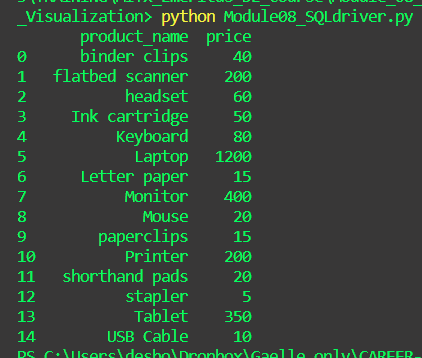
</div>




Note that I also included in that script some code to write the DataFrame into a new SQL Table (not shown here; see `Module08_SQLdriver.py` in attachment).

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

I wrote a Python script to read the MRTS data from a CSV file: `Module08_CSV_to_mySQL.py` (fully copied in section [2.5](#2.5-Writing-an-Installation-Script)). The part of the code that reads in the CSV file (and also does some further data preparation, replacing all missing values with 'NULL') is copied below:
 
 ```python
 # Import CSV file that contains the MRTS data
df = pd.read_csv(csv_file) 

# Replace all missing data (nan) with the string 'NULL'
df = df.fillna('NULL')
```

[Back to top](#Index)

### 2.5 Writing an Installation Script

The rest of the `Module08_CSV_to_mySQL.py` script writes into an SQL database (via SQL connector, with credentials provided in a separate `yaml` file, not shown) and creates and fills a new table with the MRTS data. The full installation script `Module08_CSV_to_mySQL.py` is copied below and also provided as an attachment. Each step is described in the comments within the code.

```python
# Module08_CSV_to_mySQL.py
# Gaelle Desbordes

# This script reads data from a CSV file,
# imports it into a Pandas DataFrame, 
# then cleans it up, reorganizes it,
# then writes it as a table in SQL (using SQL connector).

import yaml
import mysql.connector
import pandas as pd

# Option to choose the MRTS dataset provided by the course (with entries up to Feb 2021) 
# # or the latest downloaded dataset (up to Jan 2023)
UseLatestData = True # False 

if UseLatestData:
    csv_file = f'data_files/MRTSsales_alldata_upto2023.csv'
    table_name = 'MRTSsales_upto2023'
else:
    csv_file = f'data_files/MRTSsales_alldata.csv'
    table_name = 'MRTSsales_upto2021'

# Create AllData as an empty dataframe
AllData = pd.DataFrame()

# Open SQL connector via a yaml file
db = yaml.safe_load(open('db.yaml'))
config = {
    'user':     db['user'],
    'password': db['pwrd'],
    'host':     db['host'],
    'database': db['db'],
    'auth_plugin':  'mysql_native_password'
}
cnx = mysql.connector.connect(**config)
cursor = cnx.cursor()

# Preparing lists of column names for the SQL table, in which each row corresponds to a 
# different time point. the first column is for "month/year", then the numeric data 
# goes into 65 columns (of type float), one for each NAICS Code category.

# Read the list of column names based on NAICS codes (augmented with the missing 
# NAICS codes found at
#  https://www.census.gov/econ/currentdata/dbsearch?programCode=MRTS
# then manually edited for compliance and saved as a csv file)
NAICS_codes = pd.read_csv(f'data_files/List_of_NAICS_Codes.csv',header=None)

# Generate the list of table column titles as 'table_columns' (a string used with CREATE TABLE 
# in SQL) from DataFrame NAICS_codes
NAICS_codes_list_str = ""
for Ncode in NAICS_codes.iloc[:,0]:
    NAICS_codes_list_str += f"N{Ncode} float,"
NAICS_codes_list_str = NAICS_codes_list_str[:-1]                            
table_columns = "(ID INT NOT NULL AUTO_INCREMENT, MONTHYEAR VARCHAR(20)," + NAICS_codes_list_str + ", PRIMARY KEY (ID))"

# Likewise, generate column_list (string used with INSERT INTO in SQL)
NAICS_codes_list_str = ""
for Ncode in NAICS_codes.iloc[:,0]:
    NAICS_codes_list_str += f"N{Ncode},"
NAICS_codes_list_str = NAICS_codes_list_str[:-1]                            
column_list = "(MONTHYEAR,"+ NAICS_codes_list_str + ")"

# In SQL, create table {table_name} if it does not exist
cursor.execute(f"CREATE TABLE IF NOT EXISTS {table_name} {table_columns}")

# Import CSV file that contains the MRTS data
df = pd.read_csv(csv_file) 

# Replace all missing data (nan) with the string 'NULL'
df = df.fillna('NULL')

# Write DataFrame df into SQL table {table_name}, row by row:
for row in df.itertuples():

    # Get the first entry of this row -- which is a date element -- as a string
    date_el = str(row[2])
     
    # Get all the other (numerical) values in this row
    values_list = ""
    for i in range(3,68): 
        values_list += ",{row._" + f"{i}" + "}"
    values_list += ")"

    # Replace all {row._i} by their numerical value in string values_list
    values_list = values_list.format(**locals())
    values_list = "(\"" + date_el + "\"" + values_list

    # Put together the full SQL INSERT query for this row as a string, then execute the query
    insert_query = (
        f"INSERT INTO {table_name} {column_list} "
        f"VALUES {values_list}"     
        )   

    cursor.execute(insert_query)
    

# Commit all changes to the SQL database then close the connector
cnx.commit()
cursor.close()
cnx.close()
```


[Back to top](#Index)

## 3. Analysis and Visualization


[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbench

Below are the *queries* I ran against the `mrtssales` table in MySQL Workbench to verify that everything worked as expected. 

#### 3.1.1 Query #1: Standard date format

The first basic query is to view the dates in a standard (ISO) date format as '1992-01-01' etc.

```
SELECT monthyear, STR_TO_DATE(monthyear, '%d %b %Y') AS 'Standard Date' FROM mrtssales;
```

The result is as expected, as shown in the screenshot below.


<div>
    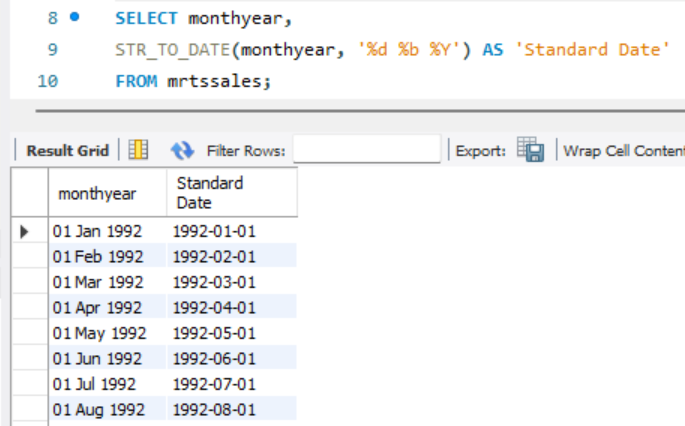
</div>

#### Query #2: Total retail and food services sales in 1992
The second query is to compute the 1992 year total (sum across all 12 months) for "Retail and food service, total" which corresponds to the column `N44X72` in our SQL table `mrtssales`. Computing this value (as "1992 TOTAL sales") is helpful because this same value is provided in the original xls file under `TOTAL` (Column O) and its value is 2,014,102, so we can verify that we get the same result in MySQL Workbench:

```
SELECT(SUM(N44X72)) AS "1992 TOTAL sales"
FROM mrtssales
WHERE YEAR(STR_TO_DATE(monthyear, '%d %b %Y')) = 1992;
```

The result is as expected, as shown in the screenshot below.

<div>
    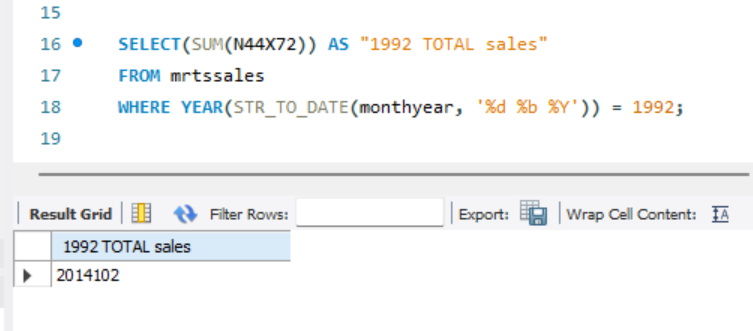
</div>


[Back to top](#Index)

### 3.2 Running Queries From Python

I wrote the same two SQL queries within a Python script that uses SQL connector. In brief, each query is passed as a string, `query`, to `cursor.execute(query)` and then the result is printed to the terminal using 
```python
for row in cursor.fetchall():
    print(row)
```
    
The full script is provided separately as file `Module08_SQL_queries.py`. Its output, essentially the same as in MySQL Workbench, is shown in the screenshot below (using `LIMIT 15` at the end of query 1 to limit the number of rows to 15).

<div>
    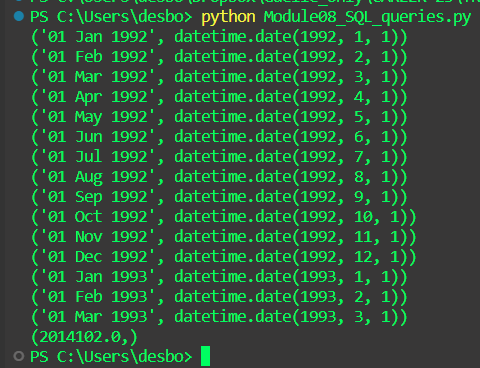
</div>

In summary, running these two queries from Python via SQL Connector works just as well as running them from MySQL Workbench.

[Back to top](#Index)

### 3.3 Explore Trends

#### 3.3.1 what is an economic trend?

An economic trend is the general direction (or movement) of economic variables over a period of time. These variables include GDP, inflation, employment, interest rates, spending, etc. Tracking economic trends can be used to predict spending patterns and inform economic decision-making. For example, if the economy is experiencing a period of growth, people are likely to have higher incomes and feel more confident about their financial future. This increased confidence may encourage them to spend more money on goods and services, leading to an increase in overall consumer spending. Similarly, if the economy is experiencing a recession, people may have lower incomes and feel less secure about their financial future, leading to a decrease in overall consumer spending. Therefore, predicting spending patterns can be used by policymakers, businesses, and individuals to make informed decisions about investments, business strategies, personal finances, etc. 

#### 3.3.2 What is the trend of the total retail sales and food services?

In the graph below we plot the MRTS monthly data for the category "Retail and food services sales, total (44X72)", not adjusted, from 1992 until 2022. 

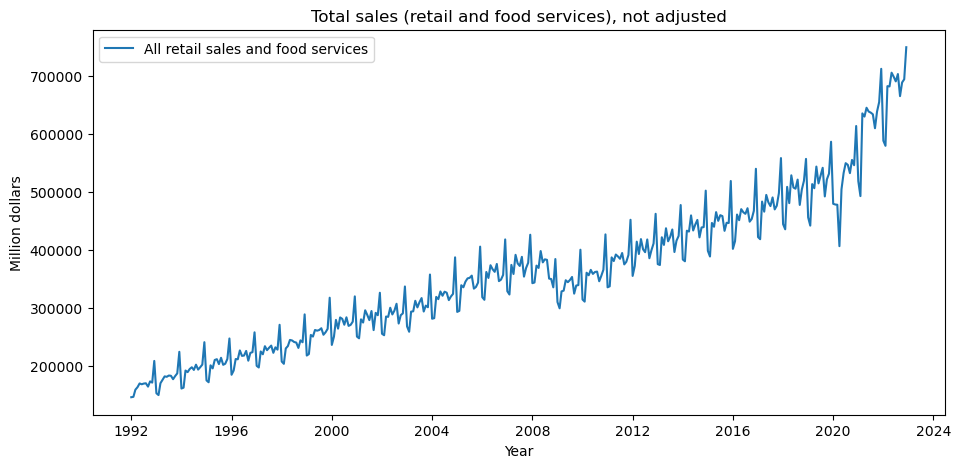

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Total sales (retail and food services), not adjusted'}, xlabel='Year', ylabel='Million dollars'>)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

UseLatestData = True # False

if UseLatestData:
    data_file = f"data_files/MRTSsales_alldata_upto2023.pkl"
else:
    data_file = f"data_files/MRTSsales_alldata.pkl"
    
# Load AllData as a Pandas DataFrame, previously saved as a pickle file
AllData = pd.read_pickle(data_file)

# Define a new function, plot_nice, to be used throughout
def plot_nice(x, y, legendlabel, title="", xlabel='', ylabel='', dpi=100):
    fig, ax = plt.subplots(figsize=(11,5), dpi=dpi)
    ax.plot(x, y, label = legendlabel)
    ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
    legend=ax.legend()
    plt.show()
    return fig, ax
    
x= AllData['date']
y = AllData['44X72']
legendlabel = 'All retail sales and food services'
title = 'Total sales (retail and food services), not adjusted'
xlabel = 'Year'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

The above plot indicates that the data are a bit noisy, most likely because of seasonal patterns that cause significant variations from month to month. To improve visibility of the _economic trend_ (which is our focus here), below we plot the same data again but using a "boxplot" graph (also known as [box-and-whisker plot](https://en.wikipedia.org/wiki/Box_plot)) using the Seaborn function `sns.boxplot`. 

In short, all monthly data from the same year are summarized as a box that simultaneously represents the median (as the line within the box) and the first and third quartiles (as the upper and lower boundaries of the box). In addition, in the boxplot graph below, the boundaries of the whiskers show the 1.5 interquartile range (IQR) value and the additional data points above and below are outliers (those are the default options in `sns.boxplot`).



Text(0.5, 0.98, 'Yearly sales (retail and food services), not adjusted')

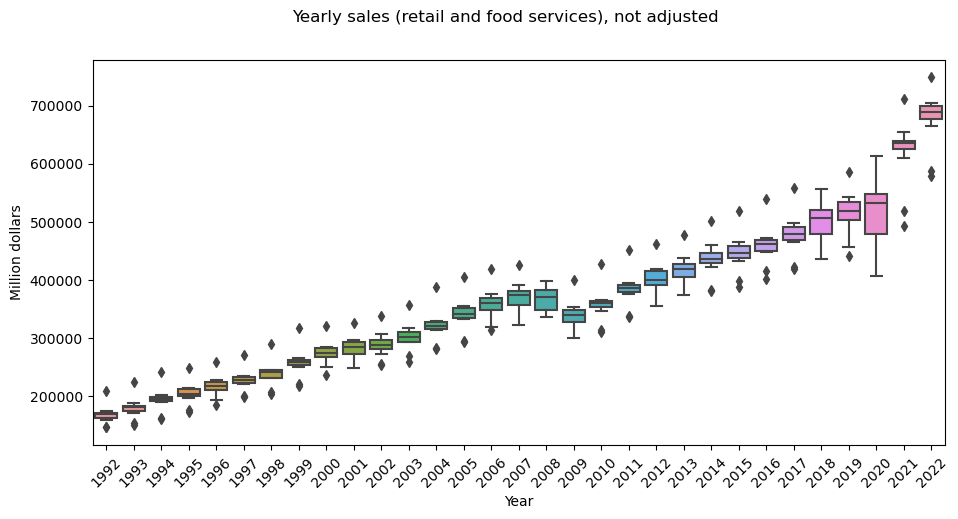

In [2]:
# Visualize trend over the years
# by plotting boxplots (in Seaborn) for each year

# Add a column 'year'
AllData['year'] = [d.year for d in AllData.date]

# Draw boxplot using Seaborn (sns)
fig, axes = plt.subplots(1, 1, figsize=(11, 5), dpi= 100)
sns.boxplot(x='year', y='44X72', data=AllData) #, ax=axes[0])
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.ylabel('Million dollars')
plt.suptitle('Yearly sales (retail and food services), not adjusted')

In the above boxplot graph, the trend for all retail and food services sales is now clearer. There is a steady increase from 1992 until today, with two notable events: there was a sharp decrease in 2008 (at the time of the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession)), and a second major dip in early 2020 (at the beginning of the [Covid-19 recession](https://en.wikipedia.org/wiki/COVID-19_recession)), a year where there is also much greater variability (as seen by the larger size of the box and length of the whiskers).

#### 3.3.3 Comparing trends between bookstores, sporting goods stores, and hobbies, toys, and games stores

These types of businesses correspond to the following NAICS codes:
- 45111: Sporting goods stores
- 45112: Hobby, toy, and game stores
- 451211: Bookstores

Let's display all three categories in a single plot from 1992 to present.



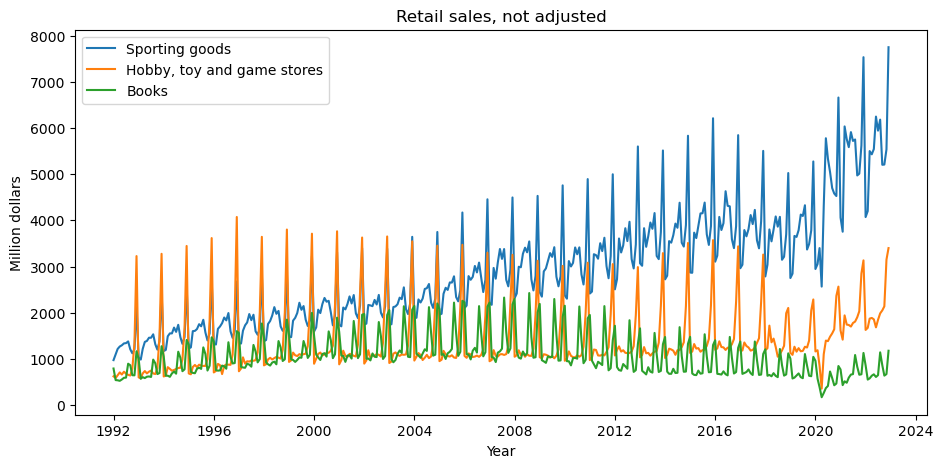

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Retail sales, not adjusted'}, xlabel='Year', ylabel='Million dollars'>)

In [3]:
x= AllData['date']
y = AllData[['45111','45112','451211']]
legendlabel = ['Sporting goods','Hobby, toy and game stores','Books']
title = 'Retail sales, not adjusted'
xlabel = 'Year'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

As we noticed with the total data, the above data for three specific categories are noisy and hard to read in this shape. Once again let's use a boxplot to better show the year-to-year trend. Since this plot is rather busy with 3 different time series, this time we will select the option not to plot the outliers, for better readability.

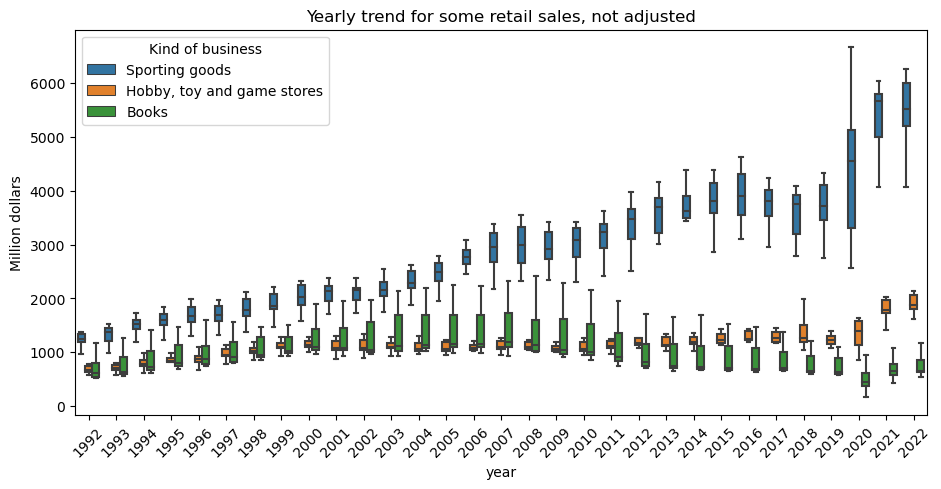

In [4]:
def box_plot_columns(df,categories_column,list_of_columns,titlesdict,legend_title,y_axis_title,**boxplotkwargs):
    columns = [categories_column] + list_of_columns
    newdf = df[columns].rename(columns=titlesdict)
    data = newdf.melt(id_vars=[categories_column], var_name=legend_title, value_name=y_axis_title)
    return sns.boxplot(data=data, x=categories_column, y=y_axis_title, hue=legend_title, showfliers=False, **boxplotkwargs)
    # showfliers=False : do not plot the outliers, for clarity
    
newtitles = {'45111': 'Sporting goods', '45112': 'Hobby, toy and game stores', '451211': 'Books'}
fig, ax = plt.subplots(1,1, figsize=(11, 5), dpi= 100)
ax = box_plot_columns(AllData,"year",['45111','45112','451211'],newtitles,"Kind of business","Million dollars",ax=ax)
ax.set_title("Yearly trend for some retail sales, not adjusted")
plt.xticks(rotation=45)
plt.show()

A few things can be noticed in the above figure. These three categories of sale do not show the same trends. 

Overall, the **sporting goods stores** show a strong increase since 1992, seamingly about 400% increase at first glance. A huge step up happened in 2020 and it is continuing to increase until present.

The **hobby, toy and game stores** also sho a significant step up in 2020 that seems to continue until present.

**Bookstores** sales, however, started to decline around 2007-2008, maybe even before the Great Recession, and have continued to decline ever since. This may be caused by consumers now buying more books online. We explore the "electronic shopping and mail-order houses" below in [3.5.3](#3.5.3-Electronic-shopping-and-mail-order-houses).

##### Is there a seasonal pattern?
To explore whether there is a seasonal pattern, we focus on the data from 1992 to 2019 only, since there seems to be greater variability in 2020-2022, which may bias the data. Below we create a different boxplot in which all months of January (from 1992 to 2019) are placed in one box, all February in the next box, etc.

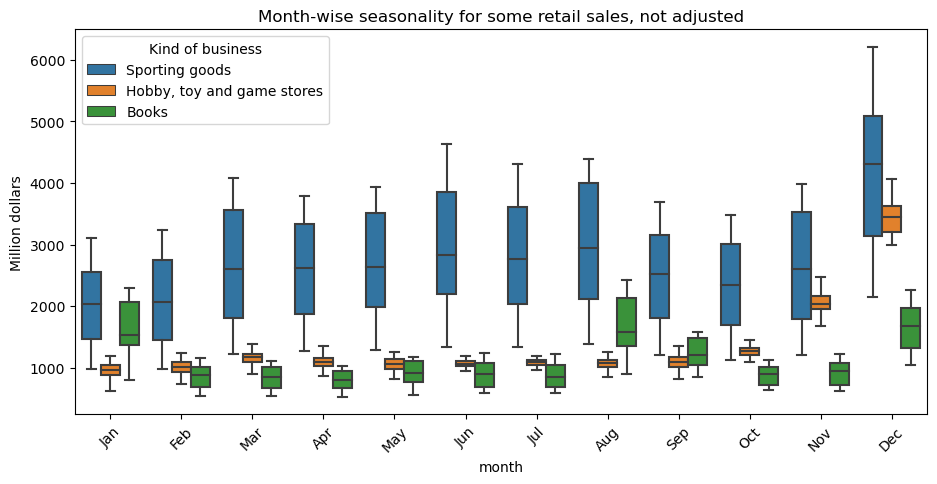

In [5]:
# Is there a seasonal pattern?
# (From 1992 to 2019)

# adding a 'month' column
AllData['month'] = [d.strftime('%b') for d in AllData.date]

# Copying AllData into a new dataframe Pre2020data with data only up to and including 2019
Pre2020data=AllData.loc[AllData.year.isin(range(1992, 2020)), :]

fig, ax = plt.subplots(1,1, figsize=(11, 5), dpi= 100)
legend_labels = {'45111': 'Sporting goods', '45112': 'Hobby, toy and game stores', '451211': 'Books'}
ax = box_plot_columns(Pre2020data,"month",['45111','45112','451211'],legend_labels,"Kind of business","Million dollars",ax=ax)
ax.set_title("Month-wise seasonality for some retail sales, not adjusted")
plt.xticks(rotation=45)
plt.show()

The above boxplot shows a clear seasonal pattern for all three retail categories, with a huge increase in sales in December, presumably due to the holiday spending season. In bookstores there is another increase in summertime (around August) as well, perhaps due to consumers buying books for beach or travel reading. Regarding "hobby, toys and games" retail, the holiday increase in sales seems to start earlier; it is already visible in November.

#### Is year 2020 different?

Below we plot only the monthly data for 2020 for the same thee categories.

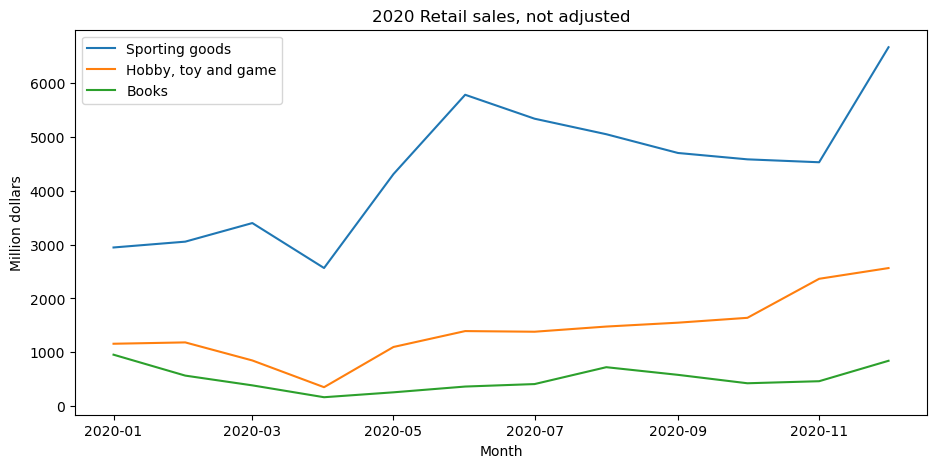

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'2020 Retail sales, not adjusted'}, xlabel='Month', ylabel='Million dollars'>)

In [6]:
# Plotting the raw data, but only for 2020
Only2020data=AllData.loc[AllData.year.isin([2020]), :].copy()
x= Only2020data['date']
y = Only2020data[['45111','45112','451211']]
legendlabel = ['Sporting goods','Hobby, toy and game','Books']
title = '2020 Retail sales, not adjusted'
xlabel = 'Month'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

The above figure shows that in 2020, all three categories of sales went down in March/April (due to the Covid lockdown that took place in many areas) and then went back up.  "Sporting goods" sales increased the most after April 2020.

[Back to top](#Index)

### 3.4 Explore Percentage Change

Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

#### In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?

Percent change is an important measure in economics because it allows us to compare changes in different quantities that are not on the same scale (such as the price of a book vs. price of a house). This information can be used to make predictions about future spending patterns. For example, by tracking the percentage change in sales over time, businesses can quantify trends and make predictions about future sales. 

In addition, the government uses percent change to track _inflation_ – the rate at which prices are rising – and may intervene to help keep the cost of living in check. When inflation is rising too quickly, the Federal Reserve can take steps to slow it down, such as raising interest rates. This makes it more expensive for businesses to borrow money, which can help to slow down economic growth and inflation.


#### Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

Below we plot the boxplot graph for men's clothing stores (NAICS code 44811) and women's clothing stores (NAICS code 44812) retail sales, using a boxplot similar as before.

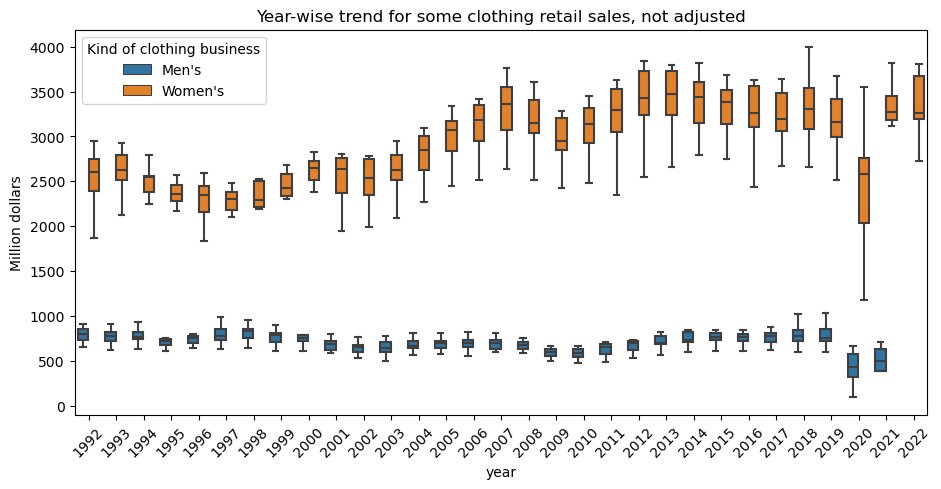

In [7]:
# Women's clothing (44812) and men's (44811) clothing
legend_titles = {'44811': "Men's",'44812': "Women's"}
fig, ax = plt.subplots(1,1, figsize=(11, 5), dpi= 100)
ax = box_plot_columns(AllData,"year",['44811','44812'],legend_titles,"Kind of clothing business","Million dollars",ax=ax)
ax.set_title("Year-wise trend for some clothing retail sales, not adjusted")
plt.xticks(rotation=45)
plt.show()

In the figure above, the year 2020 looks like an outlier, again almost certainly because of the Covid-19 recession. In addition, for men's clothing stores the data ends in Apr 2021; the data is missing for all data points after that.

If we limit our analysis to years 1992-2019, we see that women's retail clothing sales have overall increased while men's remained roughly constant. 

Let's look at how these two types of businesses (44812: women's clothing only, 44811: men's clothing only) contribute to the whole of clothing retail sales, as measured by the "Clothing stores" category (NAICS code 4481) and how it changes over time.

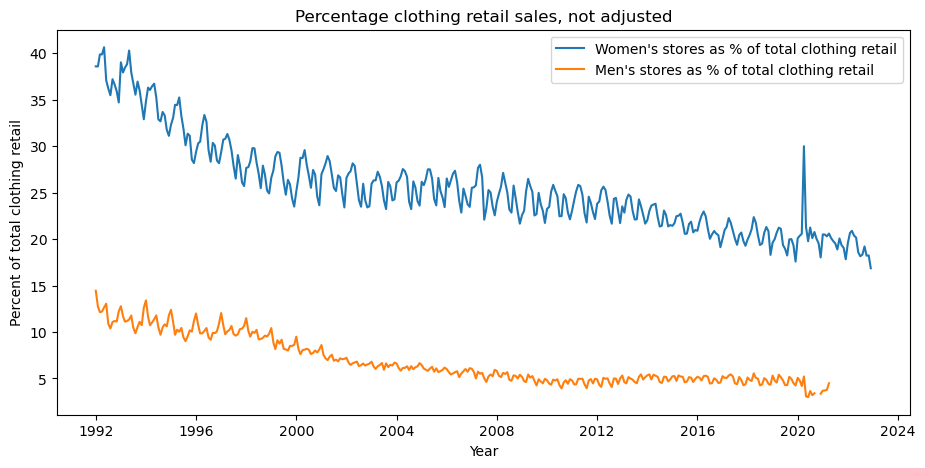

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Percentage clothing retail sales, not adjusted'}, xlabel='Year', ylabel='Percent of total clothing retail'>)

In [8]:
# Add a column 'WomensClothingPct' that is the percentage of women's stores out of all clothing stores
AllData['WomensClothingPct'] = AllData['44812'] / AllData['4481'] * 100
# Same thing for men's stores
AllData['MensClothingPct'] = AllData['44811'] / AllData['4481'] * 100

# Plot those using "plot_nice" function defined above
x= AllData['date']
y = AllData[['WomensClothingPct','MensClothingPct']]
legendlabel = ["Women's stores as % of total clothing retail", "Men's stores as % of total clothing retail"]
title = 'Percentage clothing retail sales, not adjusted'
xlabel = 'Year'
ylabel = 'Percent of total clothing retail'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

The above graph shows the percentage of total clothing retail that is held by women's stores and by men's stores. (As before, we note that the men's data ends in Apr 2021.) The two numbers do not add up to 100%, because in addition to men's stores and women's stores, the "Clothing stores" category (NAICS code 4481) also comprises "family clothing stores" (NAICS code 44814) and "other clothing stores" (44819). 

It is clear that over time, men's stores and women's stores have experienced a decline in their contribution to total clothing retail sales. Since we saw in a previous graph that men's stores have had roughly constant sales and women's stores have seen increased sales since 1992, it is clear that the family clothing stores and other clothing stores have increasingly contributed to total clothing retail sales in the period since 1992.

Now let's look at percent changes, using the `pct_change()` function in Pandas.

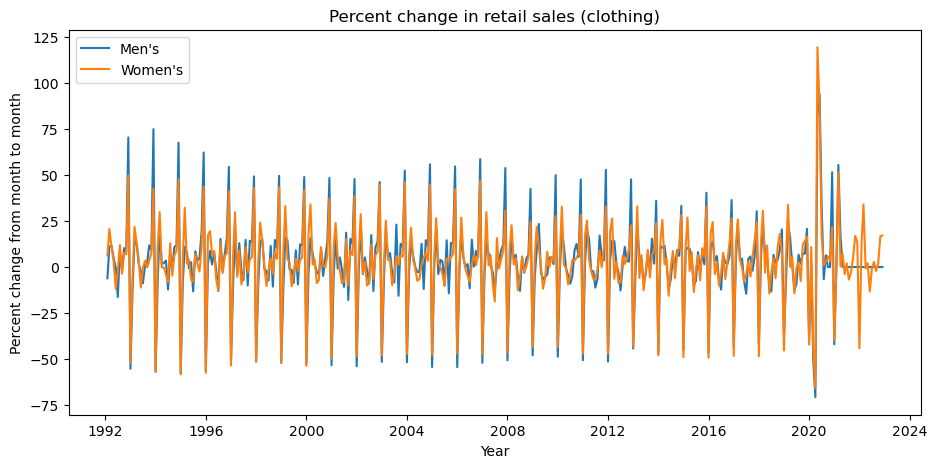

44811    2.995398
44812    2.949235
dtype: float64


In [9]:
x = AllData['date']
y = AllData[['44811','44812']].pct_change() * 100
legendlabel = ["Men's","Women's"]
title = 'Percent change in retail sales (clothing)'
xlabel = 'Year'
ylabel = 'Percent change from month to month'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

# Mean value of each of the two variables across the whole time period (1992-2022)
print(y.mean())


As shown above, the percent change in retail sales for both men's and women's clothing stores is highly variable (probably seasonal) but has a fairly constant average value over time, calculated (above) as 3.00% for men's and 2.95% for women's. 

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows

A _rolling time window_ is a statistical technique that is used to track the change in a variable over time. The window is a fixed-size set of data points, and as time passes, the window slides forward, so that the most recent data points are always included. This allows economists to track changes in spending patterns over time, even if the patterns are not linear. Rolling time windows are important for predicting spending patterns because they allow us to track how spending is changing over time, while also taking into account the most recent data. 

Let's use rolling time windows of different sizes (using Pandas function `df.rolling(window)`) to explore three kinds of businesses:
- All clothing and accessories stores [NAICS code 448]. Rolling time window: 3 months
- Health and personal care stores [446]. Rolling time window: 4 months
- Electronic shopping and mail-order houses [4541]. Rolling time window: 12 month (i.e. yearly average)

#### 3.5.1 All clothing and accessories stores 

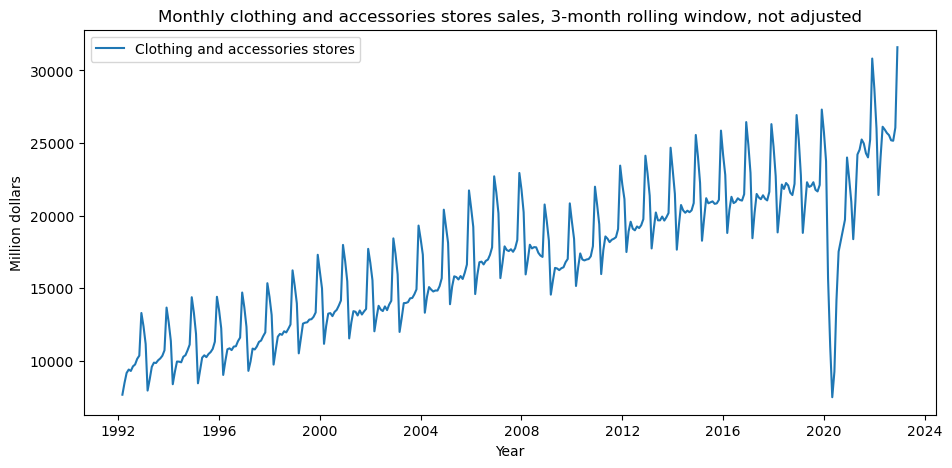

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Monthly clothing and accessories stores sales, 3-month rolling window, not adjusted'}, xlabel='Year', ylabel='Million dollars'>)

In [10]:
# All clothing and accessories stores [448]
x= AllData['date']
y = AllData['448'].rolling(3).mean()
legendlabel = 'Clothing and accessories stores'
title = 'Monthly clothing and accessories stores sales, 3-month rolling window, not adjusted'
xlabel = 'Year'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

Overall since 1992 retail sales for clothing and accessories stores have been steadily increasing. As in the total retail data, there was a significant dip in 2008 (at the time of the [Great Recession](https://en.wikipedia.org/wiki/Great_Recession)), and a second major dip in early 2020 (at the beginning of the [Covid-19 recession](https://en.wikipedia.org/wiki/COVID-19_recession)) which is especially pronounced here, probably because most of these retail stores were closed for several weeks or months.

In addition, these data for clothing and accessories stores sales, here displayed with a 3-month rolling window, show a strong level of seasonality, which I further explore below for the period 1992-2019.

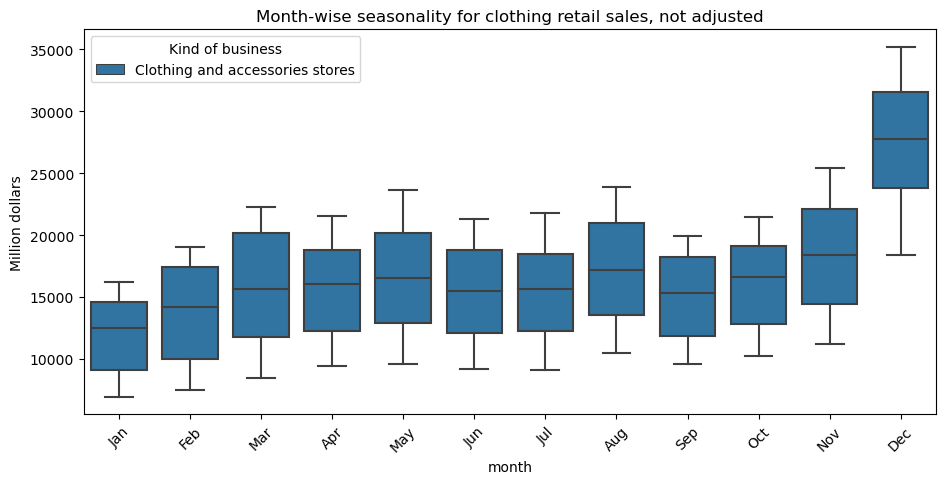

In [11]:
# Is there a seasonal pattern in clothing and accessories retail stores sales?
# (From 1992 to 2019 only)

# adding a 'month' column
AllData['month'] = [d.strftime('%b') for d in AllData.date]

# Copying AllData into a new dataframe Pre2020data with data only up to and including 2019
Pre2020data=AllData.loc[AllData.year.isin(range(1992, 2020)), :]

fig, ax = plt.subplots(1,1, figsize=(11, 5), dpi= 100)
legend_labels = {'448': 'Clothing and accessories stores'}
ax = box_plot_columns(Pre2020data,"month",['448'],legend_labels,"Kind of business","Million dollars",ax=ax)
ax.set_title("Month-wise seasonality for clothing retail sales, not adjusted")
plt.xticks(rotation=45)
plt.show()

As clearly shown in the above boxplot, retail sales data from clothing and clothing accessories stores have very strong seasonal patterns, with sales in December (holiday season) being much higher than any other month of the year, and with January being the lowest.

#### 3.5.2 Health and personal care stores

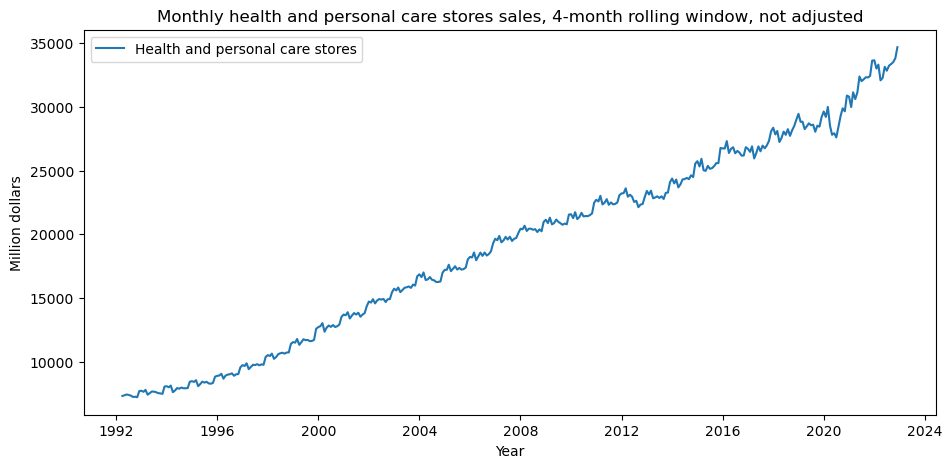

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Monthly health and personal care stores sales, 4-month rolling window, not adjusted'}, xlabel='Year', ylabel='Million dollars'>)

In [12]:
# Health and personal care stores (446)
x= AllData['date']
y = AllData['446'].rolling(4).mean()
legendlabel = 'Health and personal care stores'
title = 'Monthly health and personal care stores sales, 4-month rolling window, not adjusted'
xlabel = 'Year'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

We notice in the above graph that, when using a 4-month rolling window, the curve is smoother than in the first graphs in which the monthly data was plotted "as is". The rolling window has the effect of smoothing the monthly or seasonal variations in the time series. 

In terms of the data itself, we notice that health and personal care stores sales have increased steadily since 1992 in a manner that may be linear. Modeling this trend could be an interesting follow-up project.

#### 3.5.3 Electronic shopping and mail-order houses

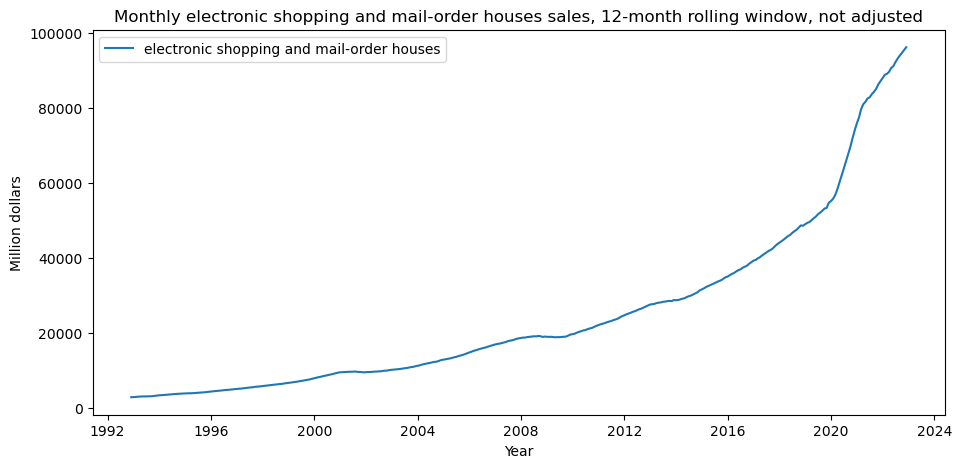

(<Figure size 1100x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Monthly electronic shopping and mail-order houses sales, 12-month rolling window, not adjusted'}, xlabel='Year', ylabel='Million dollars'>)

In [13]:
# "electronic shopping and mail-order houses" [4541] 
# Rolling time window: 12 month (i.e. yearly average)

x= AllData['date']
y = AllData['4541'].rolling(12).mean()
legendlabel = 'electronic shopping and mail-order houses'
title = 'Monthly electronic shopping and mail-order houses sales, 12-month rolling window, not adjusted'
xlabel = 'Year'
ylabel = 'Million dollars'
plot_nice(x, y, legendlabel, title, xlabel, ylabel)   

Using a 12-month window provides a lot of smoothing, as expected. This is a good way to visualize the year-by-year trends. In this case, the overall strong growth in electronic shopping and mail-order houses sales since 1992 looks like it might be _exponential_. Further modeling of these data would be interesting &mdash; including researching the reasons behind this dramatic increase which is much greater than for other retail sales. Possible reasons may include an increase in internet access in US households, broader access to smartphones from which electronic orders can be placed, the fast growth of electronic marketplaces and mail-order houses (such as Amazon), etc.

[Back to top](#Index)

## Conclusion

The MTRS dataset is a very rich dataset. It can provide answers to important questions about the US economy, where it's headed, and which sectors are promising versus not so promising.

In these exploratory analyses, we found that _men's clothing stores_ made up a rather small proportion of total clothing stores, and that this proportion had only decreased over the years and up to April 2021 (beyond which there are no longer any data available in this business category). Therefore, it seems that men's clothing stores may be attracting the least spending among the types of businesses explored here.

The most remarkable growth that we saw was the exponential-looking growth in _electronic shopping and mail-order houses sales_. These types of online businesses seem likely to attract the most spending.

Further analyses could be helpful with modeling the growth of _electronic shopping and mail-order houses sales_ and predicting its future direction.


[Back to top](#Index)

## References

- United States Census Bureau - Business and Industry - MRTS:
    - [Download the latest data (xlsx file)](https://www.census.gov/retail/mrts/www/mrtssales92-present.xlsx)
    - [Definitions](https://www.census.gov/retail/definitions.html)
    - [Time Series / Trend Charts](https://www.census.gov/econ/currentdata/?programCode=MRTS)
    - [About the surveys](https://www.census.gov/retail/mrts/about_the_surveys.html)

- North American Industry Classification System (NAICS) [2022 PDF manual](https://www.census.gov/naics/reference_files_tools/2022_NAICS_Manual.pdf)

- [Everything You Didn’t Want to Have to Know About CSV](https://towardsdatascience.com/everything-you-didnt-want-to-have-to-know-about-csv-665d0755e28) | by Alex Wennerberg | Towards Data Science 

